In [1]:
import matplotlib as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_pickle('df_cleaned24b_03.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28356 entries, 0 to 28355
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        28356 non-null  object 
 1   track_artist                    28356 non-null  object 
 2   track_popularity                28356 non-null  int64  
 3   track_album_id                  28356 non-null  object 
 4   track_album_release_date        28356 non-null  object 
 5   danceability                    28356 non-null  float64
 6   energy                          28356 non-null  float64
 7   key                             28356 non-null  int64  
 8   loudness                        28356 non-null  float64
 9   mode                            28356 non-null  int64  
 10  speechiness                     28356 non-null  float64
 11  acousticness                    28356 non-null  float64
 12  instrumentalness                

In [4]:
# Drop unrelevant columns
columns_to_drop = ['popularity_log']
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28356 entries, 0 to 28355
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        28356 non-null  object 
 1   track_artist                    28356 non-null  object 
 2   track_popularity                28356 non-null  int64  
 3   track_album_id                  28356 non-null  object 
 4   track_album_release_date        28356 non-null  object 
 5   danceability                    28356 non-null  float64
 6   energy                          28356 non-null  float64
 7   key                             28356 non-null  int64  
 8   loudness                        28356 non-null  float64
 9   mode                            28356 non-null  int64  
 10  speechiness                     28356 non-null  float64
 11  acousticness                    28356 non-null  float64
 12  instrumentalness                

## --- FEATURE ENGINEERING ---

In [5]:
# Working copy
df_fe = df.copy()


# 1. # Extract the release year and Calculate track age
df_fe['release_year'] = pd.to_datetime(df_fe['track_album_release_date'], errors='coerce').dt.year
df_fe.fillna({'release_year': df_fe['release_year'].median()}, inplace=True) # Fill missing release years with a default value (e.g., median or a specific year)

df_fe['track_age'] = 2025 - df_fe['release_year']


# Drop the track_album_release_date column
df_fe.drop(columns=['track_album_release_date'], inplace=True)

# 1. Dataset complet
df_all = df_fe.copy()

# 2. Dataset avec chansons récentes (<= 20 ans)
df_recent = df_fe[df_fe['track_age'] <= 20].copy()
df_recent

,track_id,track_artist,track_popularity,track_album_id,danceability,energy,key,loudness,mode,speechiness,...,subgenre_Rock,subgenre_Tropical / World,subgenre_Alternative / Indie.1,subgenre_Electronic.1,subgenre_Hip-Hop / Rap.1,subgenre_Pop.1,subgenre_Rock.1,subgenre_Tropical / World.1,release_year,track_age
1,002xjHwzEx66OWFV2IP9dk,Other,15,1ficfUnZMaY1QkNp15Slzm,0.582,0.704,5,-6.242,1,0.034700,...,False,False,True,False,False,False,False,False,2018,7
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,0.303,0.880,9,-4.739,1,0.044200,...,True,False,False,False,False,False,True,False,2017,8
3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,0.659,0.794,10,-5.644,0,0.054000,...,False,False,False,True,False,False,False,False,2015,10
4,008rk8F6ZxspZT4bUlkIQG,Other,38,2BuYm9UcKvI0ydXs5JKwt0,0.662,0.838,1,-6.300,1,0.049900,...,False,False,False,False,False,True,False,False,2018,7
5,00EPIEnX1JFjff8sC6bccd,thalía,12,2phs92sMy029JvPDFXUpCC,0.836,0.799,7,-4.247,0,0.087300,...,False,False,False,False,True,False,False,False,2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,7zxRMhXxJMQCeDDg0rKAVo,nav,72,4JR29CNW14Zc4Z5vflxkoJ,0.744,0.715,0,-6.103,1,0.081399,...,True,False,False,False,False,False,True,False,2017,8
28352,7zyLObYw4QUKQDyZOb4J0Y,father mc,36,14HYMxFhpgDIr9cci1u0kt,0.832,0.666,1,-4.920,0,0.063300,...,False,False,True,False,False,False,False,False,2010,15
28353,7zycSpvjDcqh6YT1FEl2kY,nicki minaj,49,5qs8T6ZHSrnllnOuUk6muC,0.963,0.603,2,-6.224,1,0.180000,...,False,False,False,True,False,False,False,False,2014,11
28354,7zye9v6B785eFWEFYs13C2,Other,40,1xdgLmTFMSyJyI5DJOOX7T,0.458,0.540,5,-6.457,0,0.027000,...,False,False,True,False,False,False,False,False,2013,12


In [6]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22834 entries, 1 to 28355
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        22834 non-null  object 
 1   track_artist                    22834 non-null  object 
 2   track_popularity                22834 non-null  int64  
 3   track_album_id                  22834 non-null  object 
 4   danceability                    22834 non-null  float64
 5   energy                          22834 non-null  float64
 6   key                             22834 non-null  int64  
 7   loudness                        22834 non-null  float64
 8   mode                            22834 non-null  int64  
 9   speechiness                     22834 non-null  float64
 10  acousticness                    22834 non-null  float64
 11  instrumentalness                22834 non-null  float64
 12  liveness                        22834

In [7]:
df_all

,track_id,track_artist,track_popularity,track_album_id,danceability,energy,key,loudness,mode,speechiness,...,subgenre_Rock,subgenre_Tropical / World,subgenre_Alternative / Indie.1,subgenre_Electronic.1,subgenre_Hip-Hop / Rap.1,subgenre_Pop.1,subgenre_Rock.1,subgenre_Tropical / World.1,release_year,track_age
0,0017A6SJgTbfQVU2EtsPNo,barbies cradle,41,1srJQ0njEQgd8w4XSqI4JQ,0.682,0.401,2,-10.068,1,0.023600,...,True,False,False,False,False,False,True,False,2001,24
1,002xjHwzEx66OWFV2IP9dk,Other,15,1ficfUnZMaY1QkNp15Slzm,0.582,0.704,5,-6.242,1,0.034700,...,False,False,True,False,False,False,False,False,2018,7
2,004s3t0ONYlzxII9PLgU6z,steady rollin,28,3z04Lb9Dsilqw68SHt6jLB,0.303,0.880,9,-4.739,1,0.044200,...,True,False,False,False,False,False,True,False,2017,8
3,008MceT31RotUANsKuzy3L,themadpixproject,24,1Z4ANBVuhTlS6DprlP0m1q,0.659,0.794,10,-5.644,0,0.054000,...,False,False,False,True,False,False,False,False,2015,10
4,008rk8F6ZxspZT4bUlkIQG,Other,38,2BuYm9UcKvI0ydXs5JKwt0,0.662,0.838,1,-6.300,1,0.049900,...,False,False,False,False,False,True,False,False,2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,7zxRMhXxJMQCeDDg0rKAVo,nav,72,4JR29CNW14Zc4Z5vflxkoJ,0.744,0.715,0,-6.103,1,0.081399,...,True,False,False,False,False,False,True,False,2017,8
28352,7zyLObYw4QUKQDyZOb4J0Y,father mc,36,14HYMxFhpgDIr9cci1u0kt,0.832,0.666,1,-4.920,0,0.063300,...,False,False,True,False,False,False,False,False,2010,15
28353,7zycSpvjDcqh6YT1FEl2kY,nicki minaj,49,5qs8T6ZHSrnllnOuUk6muC,0.963,0.603,2,-6.224,1,0.180000,...,False,False,False,True,False,False,False,False,2014,11
28354,7zye9v6B785eFWEFYs13C2,Other,40,1xdgLmTFMSyJyI5DJOOX7T,0.458,0.540,5,-6.457,0,0.027000,...,False,False,True,False,False,False,False,False,2013,12


In [8]:
# For loudness (left-skewed)
df_recent['loudness_log'] = np.log1p(df_recent['loudness'].abs())

In [9]:
from scipy.stats import boxcox, skew
import numpy as np
import pandas as pd


def smart_skew_transform(df, threshold=0.75, verbose=True, target=None):
    
    df_transformed = df_recent.copy()
    summary = []

    for col in df.select_dtypes(include=[np.number]).columns:
        
        if col == target:
            if verbose:
                print(f"⏩ {col} skipped (target variable)")
            continue
            
        x = df[col].dropna()
        
        # ⛔ Skip boolean or binary-encoded features
        if x.nunique() <= 2:
            if verbose:
                print(f"⏩ {col} skipped (boolean or categorical)")
            continue
        
        
        try:
            skew_orig = skew(x)
        except:
            continue

        if abs(skew_orig) < threshold:
            continue

        methods = {}
        try:
            x_log = np.log1p(np.clip(x, 1e-5, None))
            methods['log'] = (x_log, abs(skew(x_log)))
        except: pass

        try:
            x_sqrt = np.sqrt(np.clip(x, 0, None))
            methods['sqrt'] = (x_sqrt, abs(skew(x_sqrt)))
        except: pass

        try:
            x_boxcox, _ = boxcox(x + 1e-5)
            methods['boxcox'] = (x_boxcox, abs(skew(x_boxcox)))
        except: pass

        if not methods:
            continue

        best_method = min(methods.items(), key=lambda kv: kv[1][1])
        best_name = best_method[0]
        best_values = best_method[1][0]
        best_skew = best_method[1][1]

        new_col = f"{col}_{best_name}"
        df_transformed[new_col] = pd.Series(best_values, index=x.index)

        summary.append({
            'Column': col,
            'Original skew': round(skew_orig, 3),
            'Applied method': best_name,
            'Skew after': round(best_skew, 3)
        })

        if verbose:
            print(f"✅ {col} transformed using {best_name} → skew: {best_skew:.3f}")

    summary_df = pd.DataFrame(summary).sort_values(by='Skew after')
    return df_transformed, summary_df


In [10]:
df_transformed, summary = smart_skew_transform(df, target='track_popularity')
summary

⏩ track_popularity skipped (target variable)
⏩ mode skipped (boolean or categorical)
✅ speechiness transformed using boxcox → skew: 0.157
✅ acousticness transformed using boxcox → skew: 0.188
✅ instrumentalness transformed using boxcox → skew: 0.424
✅ liveness transformed using boxcox → skew: 0.070
✅ duration_ms transformed using boxcox → skew: 0.041
✅ playlist_count transformed using boxcox → skew: 2.466
⏩ edm skipped (boolean or categorical)
⏩ latin skipped (boolean or categorical)
⏩ pop skipped (boolean or categorical)
⏩ r&b skipped (boolean or categorical)
⏩ rap skipped (boolean or categorical)
⏩ rock skipped (boolean or categorical)


,Column,Original skew,Applied method,Skew after
4,duration_ms,1.115,boxcox,0.041
3,liveness,2.081,boxcox,0.070
0,speechiness,1.575,boxcox,0.157
1,acousticness,1.322,boxcox,0.188
2,instrumentalness,2.625,boxcox,0.424
5,playlist_count,5.482,boxcox,2.466


In [11]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22834 entries, 1 to 28355
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        22834 non-null  object 
 1   track_artist                    22834 non-null  object 
 2   track_popularity                22834 non-null  int64  
 3   track_album_id                  22834 non-null  object 
 4   danceability                    22834 non-null  float64
 5   energy                          22834 non-null  float64
 6   key                             22834 non-null  int64  
 7   loudness                        22834 non-null  float64
 8   mode                            22834 non-null  int64  
 9   speechiness                     22834 non-null  float64
 10  acousticness                    22834 non-null  float64
 11  instrumentalness                22834 non-null  float64
 12  liveness                        22834

In [12]:
# 1. Retrieve the names of transformed columns (after smart_skew_transform)
def get_transformed_features(summary_df):
    return [f"{row['Column']}_{row['Applied method']}" for _, row in summary_df.iterrows()]

# 2. Automatically transformed columns
transformed_cols = get_transformed_features(summary)
transformed_cols

['duration_ms_boxcox',
 'liveness_boxcox',
 'speechiness_boxcox',
 'acousticness_boxcox',
 'instrumentalness_boxcox',
 'playlist_count_boxcox']

In [13]:

def add_custom_features(df):
    df = df_transformed.copy()
    
    df['dance_energy'] = df['danceability'] * df['energy']     # 2.Creating new features
    df['valence_tempo'] = df['valence'] * df['tempo']
    df['beat_density'] = df['tempo'] / df['duration_ms_boxcox']
    df['energy_loudness_ratio'] = df['energy'] / df['loudness_log'].abs()
    df['acoustic_non_acoustic_ratio'] = df['acousticness_boxcox'] / (1 - df['acousticness_boxcox'] + 1e-5)
    df['rhythmic_stability'] = (df['danceability'] + df['valence']) / 2
    
    return df

df_transformed = add_custom_features(df_transformed)

In [14]:
def get_added_features(df_before, df_after):
    """
    Compare deux DataFrames (avant/après transformation) pour détecter les nouvelles colonnes ajoutées.
    
    Args:
        df_before (pd.DataFrame): DataFrame avant transformation
        df_after (pd.DataFrame): DataFrame après transformation
    
    Returns:
        list: noms des colonnes ajoutées
    """
    before_cols = set(df_before.columns)
    after_cols = set(df_after.columns)
    new_features = list(after_cols - before_cols)
    return new_features

# Exemple d'utilisation :
# df_before = df_transformed.copy()
# df_after = add_custom_features(df_transformed)
# added_cols = get_added_features(df_before, df_after)
# print("🆕 Nouvelles features :", added_cols)



df_before = df_recent.copy()
df_after = add_custom_features(df_transformed)
added_cols = get_added_features(df_before, df_after)

print("🆕 Nouvelles features créées :", added_cols)


🆕 Nouvelles features créées : ['rhythmic_stability', 'duration_ms_boxcox', 'valence_tempo', 'liveness_boxcox', 'instrumentalness_boxcox', 'speechiness_boxcox', 'acousticness_boxcox', 'playlist_count_boxcox', 'acoustic_non_acoustic_ratio', 'dance_energy', 'beat_density', 'energy_loudness_ratio']


In [15]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22834 entries, 1 to 28355
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        22834 non-null  object 
 1   track_artist                    22834 non-null  object 
 2   track_popularity                22834 non-null  int64  
 3   track_album_id                  22834 non-null  object 
 4   danceability                    22834 non-null  float64
 5   energy                          22834 non-null  float64
 6   key                             22834 non-null  int64  
 7   loudness                        22834 non-null  float64
 8   mode                            22834 non-null  int64  
 9   speechiness                     22834 non-null  float64
 10  acousticness                    22834 non-null  float64
 11  instrumentalness                22834 non-null  float64
 12  liveness                        22834

In [16]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22834 entries, 1 to 28355
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        22834 non-null  object 
 1   track_artist                    22834 non-null  object 
 2   track_popularity                22834 non-null  int64  
 3   track_album_id                  22834 non-null  object 
 4   danceability                    22834 non-null  float64
 5   energy                          22834 non-null  float64
 6   key                             22834 non-null  int64  
 7   loudness                        22834 non-null  float64
 8   mode                            22834 non-null  int64  
 9   speechiness                     22834 non-null  float64
 10  acousticness                    22834 non-null  float64
 11  instrumentalness                22834 non-null  float64
 12  liveness                        22834

In [17]:
target = 'track_popularity' 

features = [col for col in df_transformed.columns if col not in target]
features = df_transformed.select_dtypes(include=[np.number]).drop(columns=target).columns.tolist()
print("Features utilisées :", features)


Features utilisées : ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'playlist_count', 'edm', 'latin', 'pop', 'r&b', 'rap', 'rock', 'release_year', 'track_age', 'loudness_log', 'speechiness_boxcox', 'acousticness_boxcox', 'instrumentalness_boxcox', 'liveness_boxcox', 'duration_ms_boxcox', 'playlist_count_boxcox', 'dance_energy', 'valence_tempo', 'beat_density', 'energy_loudness_ratio', 'acoustic_non_acoustic_ratio', 'rhythmic_stability']


In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Selecting numerical columns for normalization and standardization
num_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'loudness_log', 'speechiness_boxcox', 'acousticness_boxcox', 'instrumentalness_boxcox', 
            'liveness_boxcox', 'duration_ms_boxcox', 'playlist_count_boxcox', 'dance_energy', 'valence_tempo', 
            'beat_density', 'energy_loudness_ratio', 'acoustic_non_acoustic_ratio', 'rhythmic_stability']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[num_cols])


#encode all bool columns
bool_cols = df_transformed.select_dtypes(include='bool').columns.tolist()
le = LabelEncoder()

for col in bool_cols:
    df_transformed[col] = le.fit_transform(df_transformed[col])


In [19]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22834 entries, 1 to 28355
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        22834 non-null  object 
 1   track_artist                    22834 non-null  object 
 2   track_popularity                22834 non-null  int64  
 3   track_album_id                  22834 non-null  object 
 4   danceability                    22834 non-null  float64
 5   energy                          22834 non-null  float64
 6   key                             22834 non-null  int64  
 7   loudness                        22834 non-null  float64
 8   mode                            22834 non-null  int64  
 9   speechiness                     22834 non-null  float64
 10  acousticness                    22834 non-null  float64
 11  instrumentalness                22834 non-null  float64
 12  liveness                        22834

In [20]:
# Drop unrelevant columns
columns_to_drop = ['track_id', 'track_artist', 'track_album_id']
df_transformed = df_transformed.drop(columns=columns_to_drop)

In [21]:
# Drop unrelevant columns
columns_to_drop = ['key', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness']
df_transformed = df_transformed.drop(columns=columns_to_drop)

In [22]:
df_transformed.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 22834 entries, 1 to 28355
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_popularity                22834 non-null  int64  
 1   danceability                    22834 non-null  float64
 2   energy                          22834 non-null  float64
 3   mode                            22834 non-null  int64  
 4   valence                         22834 non-null  float64
 5   tempo                           22834 non-null  float64
 6   duration_ms                     22834 non-null  int64  
 7   playlist_count                  22834 non-null  int64  
 8   edm                             22834 non-null  int64  
 9   latin                           22834 non-null  int64  
 10  pop                             22834 non-null  int64  
 11  r&b                             22834 non-null  int64  
 12  rap                             22834

# --- FEATURE SELECTION ---

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel


# Define X as all columns except 'track_popularity'
X = df_transformed.drop(columns=['track_popularity'])
y= df_transformed['track_popularity']

# Fit models and determine if a feature is selected (1) or not (0)
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

ridge = Ridge(alpha=0.01).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)


gb = GradientBoostingRegressor().fit(X, y)
gb_selected = (gb.feature_importances_ > 0).astype(int)

rf = RandomForestRegressor().fit(X, y)
rf_selected = (rf.feature_importances_ > 0).astype(int)

xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X, y)
xgb_selected = (xgb.feature_importances_ > 0).astype(int) 

# Create a DataFrame to store results
selection_df_transformed = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected, 
    'Ridge': ridge_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'XGBRegressor': xgb_selected
})

# Sum the number of selections for each feature
selection_df_transformed['Sum'] = selection_df_transformed[['Lasso', 'Ridge', 'GradientBoost', 'RandomForest','XGBRegressor']].sum(axis=1)

# Output the results
print(selection_df_transformed)


                           Feature  Lasso  Ridge  GradientBoost  RandomForest  \
0                     danceability      1      1              1             1   
1                           energy      1      1              1             1   
2                             mode      1      1              1             1   
3                          valence      1      1              1             1   
4                            tempo      1      1              1             1   
5                      duration_ms      1      1              1             1   
6                   playlist_count      1      1              1             1   
7                              edm      1      1              1             1   
8                            latin      0      1              1             1   
9                              pop      1      1              1             1   
10                             r&b      1      1              1             1   
11                          

In [24]:
 #Selecting variables with a sum of selections >= 4
final_var = selection_df_transformed[selection_df_transformed['Sum'] >= 4]['Feature'].tolist()
df_transformed_model = df_transformed[final_var].copy()
df_transformed_model['track_popularity'] = df_fe['track_popularity'].copy()

# Output the result to verify
df_transformed_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22834 entries, 1 to 28355
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   danceability                  22834 non-null  float64
 1   energy                        22834 non-null  float64
 2   mode                          22834 non-null  int64  
 3   valence                       22834 non-null  float64
 4   tempo                         22834 non-null  float64
 5   duration_ms                   22834 non-null  int64  
 6   playlist_count                22834 non-null  int64  
 7   edm                           22834 non-null  int64  
 8   latin                         22834 non-null  int64  
 9   pop                           22834 non-null  int64  
 10  r&b                           22834 non-null  int64  
 11  rap                           22834 non-null  int64  
 12  rock                          22834 non-null  int64  
 13  subgen

df_transformed_model.insert(0, 'track_popularity', df_transformed['track_popularity'])
df_transformed_model.info()

In [25]:
pd.to_pickle(df_transformed_model, 'df_transformed_features_track2.pkl')

# One-Hot Encoding

In [26]:
df = pd.read_pickle('df_transformed_features_track2.pkl')
df

,danceability,energy,mode,valence,tempo,duration_ms,playlist_count,edm,latin,pop,...,instrumentalness_boxcox,liveness_boxcox,duration_ms_boxcox,playlist_count_boxcox,dance_energy,valence_tempo,beat_density,energy_loudness_ratio,rhythmic_stability,track_popularity
1,0.582,0.704,1,0.698,150.863,197286,1,0,0,0,...,-38.333297,-1.648104,49.828276,0.00001,0.409728,105.302374,3.027658,0.355574,0.6400,15
2,0.303,0.880,1,0.404,135.225,373512,1,0,0,0,...,-7.167531,-1.102976,57.084929,0.00001,0.266640,54.630900,2.368839,0.503639,0.3535,28
3,0.659,0.794,0,0.852,128.041,228565,1,0,0,1,...,-2.440969,-1.184368,51.422481,0.00001,0.523246,109.090932,2.489981,0.419282,0.7555,24
4,0.662,0.838,1,0.496,129.884,236308,1,0,0,1,...,-14.894270,-2.672622,51.789746,0.00001,0.554756,64.422464,2.507910,0.421556,0.5790,38
5,0.836,0.799,0,0.772,94.033,217653,1,0,1,0,...,-38.333297,-2.620436,50.887497,0.00001,0.667964,72.593476,1.847861,0.482006,0.8040,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,0.744,0.715,1,0.340,154.962,179773,1,0,0,0,...,-38.333297,-2.621744,48.844508,0.00001,0.531960,52.687080,3.172557,0.364700,0.5420,72
28352,0.832,0.666,0,0.810,109.536,223890,1,0,0,0,...,-38.333297,-2.918068,51.195855,0.00001,0.554112,88.724160,2.139548,0.374507,0.8210,36
28353,0.963,0.603,1,0.647,129.990,260240,1,0,0,1,...,-34.818242,-1.637521,52.866703,0.00001,0.580689,84.103530,2.458826,0.304945,0.8050,49
28354,0.458,0.540,0,0.657,142.218,191205,1,0,0,0,...,-16.728457,-2.354351,49.494962,0.00001,0.247320,93.437226,2.873383,0.268770,0.5575,40


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22834 entries, 1 to 28355
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   danceability                  22834 non-null  float64
 1   energy                        22834 non-null  float64
 2   mode                          22834 non-null  int64  
 3   valence                       22834 non-null  float64
 4   tempo                         22834 non-null  float64
 5   duration_ms                   22834 non-null  int64  
 6   playlist_count                22834 non-null  int64  
 7   edm                           22834 non-null  int64  
 8   latin                         22834 non-null  int64  
 9   pop                           22834 non-null  int64  
 10  r&b                           22834 non-null  int64  
 11  rap                           22834 non-null  int64  
 12  rock                          22834 non-null  int64  
 13  subgen

In [28]:
#df=pd.get_dummies(df)
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in []:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22834 entries, 1 to 28355
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   danceability                  22834 non-null  float64
 1   energy                        22834 non-null  float64
 2   mode                          22834 non-null  int64  
 3   valence                       22834 non-null  float64
 4   tempo                         22834 non-null  float64
 5   duration_ms                   22834 non-null  int64  
 6   playlist_count                22834 non-null  int64  
 7   edm                           22834 non-null  int64  
 8   latin                         22834 non-null  int64  
 9   pop                           22834 non-null  int64  
 10  r&b                           22834 non-null  int64  
 11  rap                           22834 non-null  int64  
 12  rock                          22834 non-null  int64  
 13  subgen

# Model Selection and validation

Below is the full regression workflow including GridSearchCV, validation/test evaluation

In [29]:
from sklearn.model_selection import train_test_split

# Assuming df_model is already defined and contains the necessary features and target variable

# Define the target and feature set
X = df.drop(columns=['track_popularity'])
y = df['track_popularity']

# Total number of samples
total_samples = len(df)

# First split: training and temporary (test + dev)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: testing and development (dev)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Calculate percentages
train_percent = (X_train.shape[0] / total_samples) * 100
dev_percent = (X_dev.shape[0] / total_samples) * 100
test_percent = (X_test.shape[0] / total_samples) * 100

# Output the sizes of each set in percentages
print(f"Training set size: {train_percent:.2f}%")
print(f"Validation (Dev) set size: {dev_percent:.2f}%")
print(f"Testing set size: {test_percent:.2f}%")

Training set size: 70.00%
Validation (Dev) set size: 15.00%
Testing set size: 15.00%


In [30]:
y = df['track_popularity']
X = df.drop(columns=['track_popularity'])

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
import pandas as pd
import numpy as np


# 1. Split train+val / test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 🔁 2. Split train / val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# 📏 Fonction d'évaluation
def regressionMetrics(y_true, y_pred):
    return {
        'MSE': mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true,y_pred)
    }
    # Calculate RMSLE using absolute values to avoid negative issues
    res['RMSLE'] = np.sqrt(metrics.mean_squared_log_error(np.abs(y), np.abs(yhat)))
    
    return res


# 🔧 3. Param grids
param_grids = {
    "Linear Regression": {},  
    "DecisionTree": { 
        "model__max_depth": [None, 5, 10],
        "model__min_samples_split": [2, 5],
        "model__min_samples_leaf": [1, 2],
        "model__max_features": [None, 'sqrt', 'log2']
    },
    "Random Forest": {
        "model__n_estimators": [100, 200, 300],  # Fewer values for the number of tree,
        "model__max_depth": [10, 20, 30, 40, None],# Fewer values for max depth
        "model__max_features": ['auto','sqrt'],  #  # Number of features to consider at each split
        "model__min_samples_split": [2, 5, 10],  # Keep essential options only
        "model__min_samples_leaf": [1, 2, 4],  # Reduced options for leaf samples
        "model__bootstrap" : [True, False]  # Keep as is
        
    },
    "AdaBoost": {
        "model__n_estimators": [50, 100, 200],
        "model__learning_rate": [0.1, 1],
        "model__loss": ['linear', 'square']
    },
    "GBM": {
        "model__n_estimators": [100, 200],
        "model__learning_rate": [0.1, 0.3],
        "model__max_depth": [3, 5],
        "model__subsample": [0.8, 1.0],
        "model__min_samples_split": [2, 5]
    },
    "SVR": {
        "model__kernel": ['rbf', 'linear'],
        "model__C": [1, 10],
        "model__epsilon": [0.1, 0.3],
        "model__gamma": ['scale', 'auto']},
    "XGBoost":{
        "model__n_estimators": [100, 200],
        "model__max_depth": [3, 5],
        "model__learning_rate": [0.1, 0.3]
    }

}

# Base models
model_defs = {
    "Linear Regression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "GBM": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(random_state=42)
}

# GridSearchCV + validation
models_list = pd.DataFrame()
best_models = {}

for name, base_model in model_defs.items():
    print(f" Grid search for: {name}")
    
    pipeline = Pipeline([
        ("scaler", StandardScaler()),    # applies scaling before the model
        ("model", base_model)
    ])

      
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        scoring='r2',
        cv=3,
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    
     # Validation set evaluation
    y_val_pred = best_model.predict(X_val)
    metrics = regressionMetrics(y_val, y_val_pred)
    row = pd.DataFrame([{**{"Model": name}, **metrics}])
    models_list = pd.concat([models_list, row], ignore_index=True)
    best_models[name] = best_model

# Show results
print("Validation Set Performance :")
display(models_list)

# Select best model
best_model_name = models_list.sort_values(by="R2", ascending=False).iloc[0]["Model"]
final_model = best_models[best_model_name]
print(f"\n Best model selected: {best_model_name}")

# Retrain on train + val
final_model.fit(X_train_val, y_train_val)

# Final test evaluation
y_test_pred = final_model.predict(X_test)
final_metrics = regressionMetrics(y_test, y_test_pred)

print("\n Final Test Set Performance :")
for k, v in final_metrics.items():
    print(f"{k}: {v}")


 Grid search for: Linear Regression
 Grid search for: DecisionTree
 Grid search for: Random Forest
 Grid search for: AdaBoost
 Grid search for: GBM
 Grid search for: SVR
 Grid search for: XGBoost
Validation Set Performance :


,Model,MSE,RMSE,R2,MAE
0,Linear Regression,435.345271,20.864929,0.220700,17.143643
1,DecisionTree,444.059894,21.072729,0.205100,17.253170
2,Random Forest,410.666535,20.264909,0.264877,16.610849
3,AdaBoost,442.194782,21.028428,0.208439,17.580999
4,GBM,410.833813,20.269036,0.264578,16.528336
5,SVR,421.783433,20.537367,0.244977,16.149145
6,XGBoost,411.461148,20.284505,0.263455,16.559014



 Best model selected: Random Forest

 Final Test Set Performance :
MSE: 409.8554468323168
RMSE: 20.244886930588592
R2: 0.2647473408571295
MAE: 16.642822438692498


# GridSearchCV Summary Block

This block displays the best cross-validation R² score, the best hyperparameters and a plot of mean test scores

### 🔍 Best Cross-Validation R² for **XGBoost**: `0.2419`

**Best Hyperparameters:** `{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}`

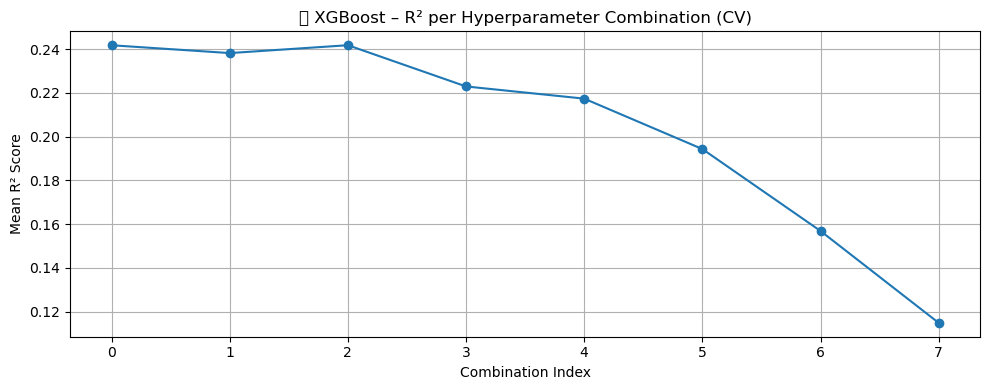

In [32]:
#  GridSearch Summary for current model
best_score = grid.best_score_
best_params = grid.best_params_

from IPython.display import display, Markdown
display(Markdown(f"### 🔍 Best Cross-Validation R² for **{name}**: `{round(best_score, 4)}`"))
display(Markdown(f"**Best Hyperparameters:** `{best_params}`"))

# 📊 Plot all CV mean scores
cv_results = pd.DataFrame(grid.cv_results_)
plt.figure(figsize=(10, 4))
plt.plot(cv_results['mean_test_score'], marker='o')
plt.title(f"📈 {name} – R² per Hyperparameter Combination (CV)")
plt.xlabel("Combination Index")
plt.ylabel("Mean R² Score")
plt.grid(True)
plt.tight_layout()
plt.show()



In [38]:
#  GridSearch Summary for current model
best_score = grid.best_score_
best_params = grid.best_params_


from IPython.display import display, Markdown
display(Markdown(f"### 🔍 Best Cross-Validation R² for **{best_model_name}**: `{round(best_score, 4)}`"))
display(Markdown(f"**Best Hyperparameters:** `{best_params}`"))

# 📊 Plot all CV mean scores
cv_results = pd.DataFrame(grid.cv_results_)
plt.figure(figsize=(10, 4))
plt.plot(cv_results['mean_test_score'], marker='o')
plt.title(f"📈 {name} – R² per Hyperparameter Combination (CV)")
plt.xlabel("Combination Index")
plt.ylabel("Mean R² Score")
plt.grid(True)
plt.tight_layout()
plt.show()
}**: `{round(best_score, 4)}`"))
display(Markdown(f"**Best Hyperparameters:** `{best_params}`"))

# 📊 Plot all CV mean scores
cv_results = pd.DataFrame(grid.cv_results_)
plt.figure(figsize=(10, 4))
plt.plot(cv_results['mean_test_score'], marker='o')
plt.title(f"📈 {name} – R² per Hyperparameter Combination (CV)")
plt.xlabel("Combination Index")
plt.ylabel("Mean R² Score")
plt.grid(True)
plt.tight_layout()
plt.show()


SyntaxError: unmatched '}' (1729485065.py, line 20)

In [33]:
#  Show validation results
models_list.sort_values(by="R2", ascending=False)

,Model,MSE,RMSE,R2,MAE
2,Random Forest,410.666535,20.264909,0.264877,16.610849
4,GBM,410.833813,20.269036,0.264578,16.528336
6,XGBoost,411.461148,20.284505,0.263455,16.559014
5,SVR,421.783433,20.537367,0.244977,16.149145
0,Linear Regression,435.345271,20.864929,0.220700,17.143643
3,AdaBoost,442.194782,21.028428,0.208439,17.580999
1,DecisionTree,444.059894,21.072729,0.205100,17.253170


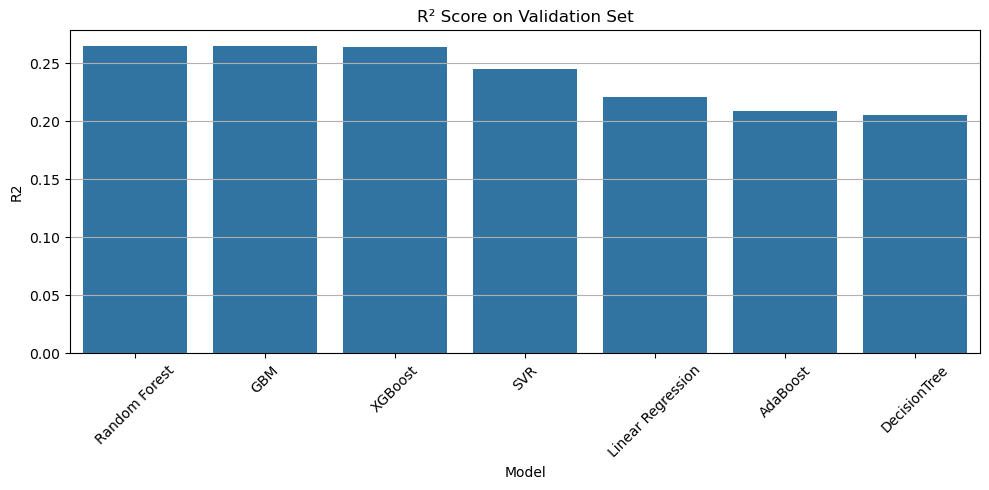

In [34]:
# Barplot
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(data=models_list.sort_values(by="R2", ascending=False), x="Model", y="R2")
plt.title("R² Score on Validation Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

In [35]:
#  Retrain best model on train+val and evaluate on test
best_name = models_list.sort_values(by="R2", ascending=False).iloc[0]["Model"]
final_model = best_models[best_name]
final_model.fit(X_train_val, y_train_val)
y_test_pred = final_model.predict(X_test)
final_metrics = regressionMetrics(y_test, y_test_pred)
print(f"\n✅ Final test performance for {best_name}:")
print(final_metrics)


✅ Final test performance for Random Forest:
{'MSE': 409.8554468323168, 'RMSE': 20.244886930588592, 'R2': 0.2647473408571295, 'MAE': 16.642822438692498}


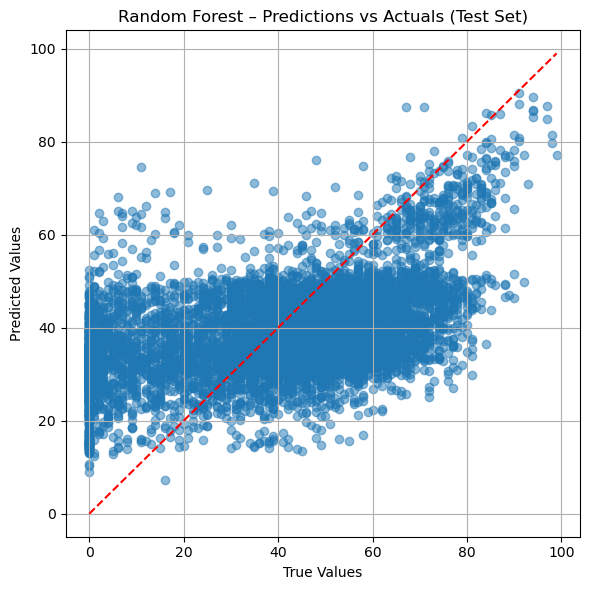

In [36]:
#  Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"{best_name} – Predictions vs Actuals (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()

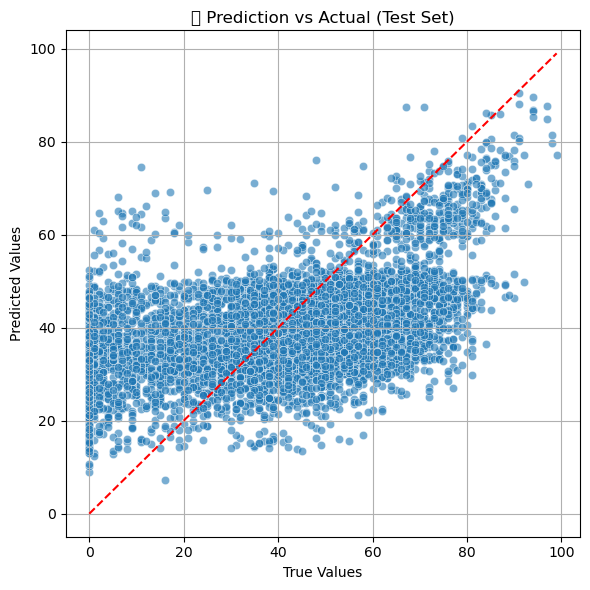

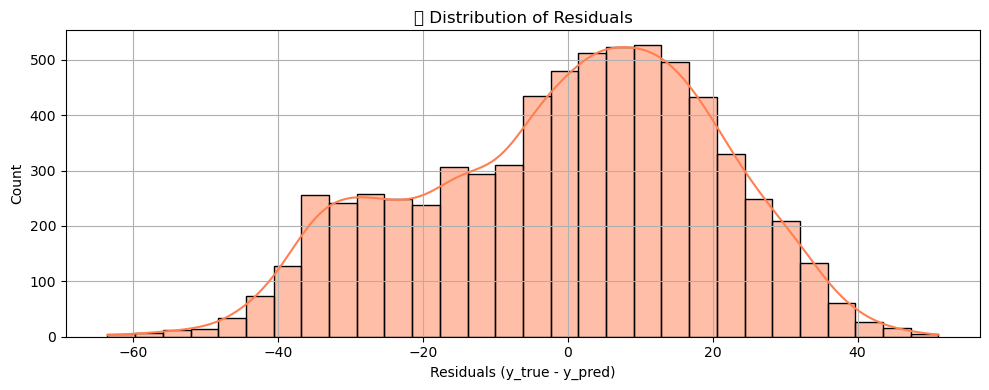

In [37]:
import seaborn as sns

# 📈 Scatter plot : y_test vs y_pred
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("🎯 Prediction vs Actual (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 Résidus
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 4))
sns.histplot(residuals, kde=True, bins=30, color="coral")
plt.title("📉 Distribution of Residuals")
plt.xlabel("Residuals (y_true - y_pred)")
plt.grid(True)
plt.tight_layout()
plt.show()
